<a href="https://colab.research.google.com/github/SudeshnaPandit67/Object-Detection-Using-Yolo-algorithm/blob/main/Object_Detection_Using_Open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GRIP:The Spark Foundation
###Task 1: Object Detection
###Author: Sudeshna Pandit

In [79]:
!pip install opencv-python

In [80]:
#import open cv, numpy and matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Select the image and upload the image and copy the url

In [81]:
#read the image
image=cv2.imread("/content/Laptop.jpeg")


In [82]:
#type of the image
type(image)

numpy.ndarray

In [83]:
#shape of the image(Width,Height,Channel)
image.shape

(1200, 1200, 3)

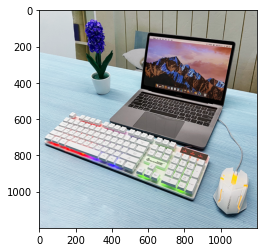

In [84]:
#show the image
plt.imshow(image)

In [85]:
#Load YOLO file. It contents the list of names of the object
yolo=cv2.dnn.readNet("/content/yolov3-tiny.cfg","/content/yolov3-tiny.weights")

###We create a class and read the name of the objects enlisted in the file 

In [86]:
classes=[]
with open("/content/coco.names",'r') as f:
  classes=f.read().splitlines()

In [88]:
#Print the total number of objects we can identify
len(classes)

80

###Name of the object We can detect

In [89]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


###We then load the image for detection and we also get its width and height.


In [90]:
img=cv2.imread("/content/Laptop.jpeg")

In [91]:
img=cv2.resize(img,None,fx=0.4,fy=0.4)

In [92]:
height,width,channels=img.shape

#### As Open CV can detect object using BGR format, so we have to convert the image in RGB. Here we do regularization by dividing all the pixels by 255 to ensure that values are ranging from zero and one. We have to reshape the image as algorithm cannot read this huge image

In [93]:
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [94]:
blob.shape

(1, 3, 320, 320)

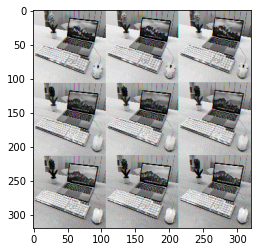

In [95]:
#print the image
i=blob[0].reshape(320,320,3)
plt.imshow(i)

###Here we are getting three images because there are three channels--R,G,B

In [96]:
#Set the blob as input image
yolo.setInput(blob)

In [97]:
#layeroutput is an array that conains all the informations about objects detected, their position and the confidence about the detection.
output_layer_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layer_name)

####Now we need to capture the bounding boxes to detect the image and there are multiple number of bounding boxes. So, we have to create a list

In [98]:
boxes= []
confidences= []
class_ids = []
for output in layeroutput:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]
    
    if confidence>0.5: 
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)

      w=int(detection[2]*width)
      h=int(detection[3]*height)
      # Rectangle_Coordinates
      x= int(center_x - w/2)
      y= int(center_y - h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

#### In the boxes the first four parameters are responsible for position and rest are responsible for confidences i.e. probablity of that particular character being in that box. So, Score is calculated excluding first four boxes.

In [99]:
#To print the elements available in the box
print(len(boxes))

5


#### The above result shows 1. It means we can detect only one object from the image

In [100]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

###To choose font and color

In [101]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

###We finally extract all the informations and show them on the screen.

**Box**: contain the coordinates of the rectangle sorrounding the object detected.
**Label**: it’s the name of the object detected
**Confidence**: the confidence about the detection from 0 to 1.

In [102]:
for i in indexes.flatten():
  x,y,w,h=boxes[i]

  label=str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img, label+" "+confi,(x,y+20),font,2,(0,255,0),2 )

###To show the image with detected object


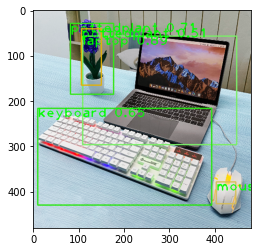

In [103]:
plt.imshow(img)

###To save it into a folder as a jpg file 

In [104]:
cv2.imwrite("./img.jpg",img)

True